# Link to Git Hub:
https://github.com/A-Kowolik/Global_Energy_Sustainability/tree/main

Modules Used for Preliminary analysis

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

File Upload

In [ ]:
uploaded = files.upload()

Saving global-data-on-sustainable-energy.csv to global-data-on-sustainable-energy.csv


# Importing the dataset & Showcase

In [ ]:
path = '/content/global-data-on-sustainable-energy.csv'
SustainEnergyDataCV = pd.read_csv(path)
SustainEnergyData = pd.DataFrame(data=SustainEnergyDataCV)
SustainEnergyData.head(5)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


# Cleaning Data

Column Rename

In [ ]:
SustainEnergyData = SustainEnergyData.rename(columns = {"Density\\n(P/Km2)":"Density",
                                                        "Value_co2_emissions_kt_by_country":"CO2_Emissions(kT)",
                                                        "Financial flows to developing countries (US $)":"Financial_flow_developing_countries",
                                                        "Renewables (% equivalent primary energy)": "Renewables_%", "Land Area(Km2)":"Land_Area",
                                                        "Access to clean fuels for cooking": "Access_Clean_Fuels_for_Cooking", "Renewable-electricity-generating-capacity-per-capita":"Renewable_Electricity_Generating_Capacity_per_Capita",
                                                        "Renewable energy share in the total final energy consumption (%)":"Renewable_Energy_Share_in_Total_Final_Energy_Consumption_%",
                                                        "Electricity from fossil fuels (TWh)": "Electricity_from_Fossil_Fuels_(TWh)", "Electricity from nuclear (TWh)":"Electricity_from_Nuclear(TWh)",
                                                        "Electricity from renewables (TWh)": "Electricity_from_Renewables(TWh)", "Low-carbon electricity (% electricity)":"Low-carbon_Electricity",
                                                        "Energy intensity level of primary energy (MJ/$2017 PPP GDP)":"Energy_Intensity_Levels_of_Primary_Energy"})

In [ ]:
for col in SustainEnergyData:
  print(col)

Entity
Year
Access to electricity (% of population)
Access_Clean_Fuels_for_Cooking
Renewable_Electricity_Generating_Capacity_per_Capita
Financial_flow_developing_countries
Renewable_Energy_Share_in_Total_Final_Energy_Consumption_%
Electricity_from_Fossil_Fuels_(TWh)
Electricity_from_Nuclear(TWh)
Electricity_from_Renewables(TWh)
Low-carbon_Electricity
Primary energy consumption per capita (kWh/person)
Energy_Intensity_Levels_of_Primary_Energy
CO2_Emissions(kT)
Renewables_%
gdp_growth
gdp_per_capita
Density
Land_Area
Latitude
Longitude


Dropping Columns

In [ ]:
#removal of these columns are because they do not have bearing on the questions or in the case of
#Financial Flow Developing Countries, Renewable (% equivalent primary energy) they have over half of the data missing
SustainEnergyData = SustainEnergyData.drop(['Entity','Year','Density','Latitude', 'Longitude', "Land_Area", "Renewables_%", "Financial_flow_developing_countries"], axis=1)

In [ ]:
for col in SustainEnergyData:
  print(col)

Access to electricity (% of population)
Access_Clean_Fuels_for_Cooking
Renewable_Electricity_Generating_Capacity_per_Capita
Renewable_Energy_Share_in_Total_Final_Energy_Consumption_%
Electricity_from_Fossil_Fuels_(TWh)
Electricity_from_Nuclear(TWh)
Electricity_from_Renewables(TWh)
Low-carbon_Electricity
Primary energy consumption per capita (kWh/person)
Energy_Intensity_Levels_of_Primary_Energy
CO2_Emissions(kT)
gdp_growth
gdp_per_capita


Replacing NAs with Zeros

In [ ]:
#Settign the NAs to Zeros since majority of columns have some missing data
Cleaned_SustainEnergyData = SustainEnergyData.fillna(0)

In [ ]:
Cleaned_SustainEnergyData.isnull().sum()

Access to electricity (% of population)                       0
Access_Clean_Fuels_for_Cooking                                0
Renewable_Electricity_Generating_Capacity_per_Capita          0
Renewable_Energy_Share_in_Total_Final_Energy_Consumption_%    0
Electricity_from_Fossil_Fuels_(TWh)                           0
Electricity_from_Nuclear(TWh)                                 0
Electricity_from_Renewables(TWh)                              0
Low-carbon_Electricity                                        0
Primary energy consumption per capita (kWh/person)            0
Energy_Intensity_Levels_of_Primary_Energy                     0
CO2_Emissions(kT)                                             0
gdp_growth                                                    0
gdp_per_capita                                                0
dtype: int64

In [ ]:
Cleaned_SustainEnergyData["CO2_Emissions(kT)"] = Cleaned_SustainEnergyData["CO2_Emissions(kT)"].astype(float).astype(int)

# Stepwise Regression

In [ ]:
y_col = "CO2_Emissions(kT)"
x_col = Cleaned_SustainEnergyData.columns[Cleaned_SustainEnergyData.columns != "CO2_Emissions(kT)"]

def get_stats():
  x= Cleaned_SustainEnergyData[x_col]
  y= Cleaned_SustainEnergyData[y_col]
  results = sm.OLS(y, x).fit()
  print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:      CO2_Emissions(kT)   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              2957.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):                        0.00
Time:                        18:04:09   Log-Likelihood:                         -50168.
No. Observations:                3649   AIC:                                  1.004e+05
Df Residuals:                    3637   BIC:                                  1.004e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                                                 coef    std err          t      P>|t|      [0.025      

Dropping GDP Growth, Access to Clean Fuels for Cooking Column

In [ ]:
Cleaned_SustainEnergyData = Cleaned_SustainEnergyData.drop(['gdp_growth'], axis=1)

Iteration of Stepwise Regression  

In [ ]:
y_col = "CO2_Emissions(kT)"
x_col = Cleaned_SustainEnergyData.columns[Cleaned_SustainEnergyData.columns != "CO2_Emissions(kT)"]
def get_stats():
  x= Cleaned_SustainEnergyData[x_col]
  y= Cleaned_SustainEnergyData[y_col]
  results = sm.OLS(y, x).fit()
  print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:      CO2_Emissions(kT)   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              3219.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):                        0.00
Time:                        18:04:12   Log-Likelihood:                         -50172.
No. Observations:                3649   AIC:                                  1.004e+05
Df Residuals:                    3638   BIC:                                  1.004e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                                                 coef    std err          t      P>|t|      [0.025      

In [ ]:
Cleaned_SustainEnergyData = Cleaned_SustainEnergyData.drop(['Access_Clean_Fuels_for_Cooking'], axis=1)

In [ ]:
y_col = "CO2_Emissions(kT)"
x_col = Cleaned_SustainEnergyData.columns[Cleaned_SustainEnergyData.columns != "CO2_Emissions(kT)"]
def get_stats():
  x= Cleaned_SustainEnergyData[x_col]
  y= Cleaned_SustainEnergyData[y_col]
  results = sm.OLS(y, x).fit()
  print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:      CO2_Emissions(kT)   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              3537.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):                        0.00
Time:                        18:04:16   Log-Likelihood:                         -50174.
No. Observations:                3649   AIC:                                  1.004e+05
Df Residuals:                    3639   BIC:                                  1.004e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                                                 coef    std err          t      P>|t|      [0.025      

# Spliting the data

In [ ]:
# Split dataset into training set and test set
# Our class column is CO2_Emissions(kT)
class_col_name='CO2_Emissions(kT)'

feature_names=Cleaned_SustainEnergyData.columns[Cleaned_SustainEnergyData.columns != class_col_name]
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(Cleaned_SustainEnergyData.loc[:, feature_names], Cleaned_SustainEnergyData[class_col_name], test_size=0.3,random_state=1)

# Decision Tree

In [ ]:
clf = DecisionTreeRegressor(max_depth=5, random_state=123)
Mod = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


Visualization of Decision Tree

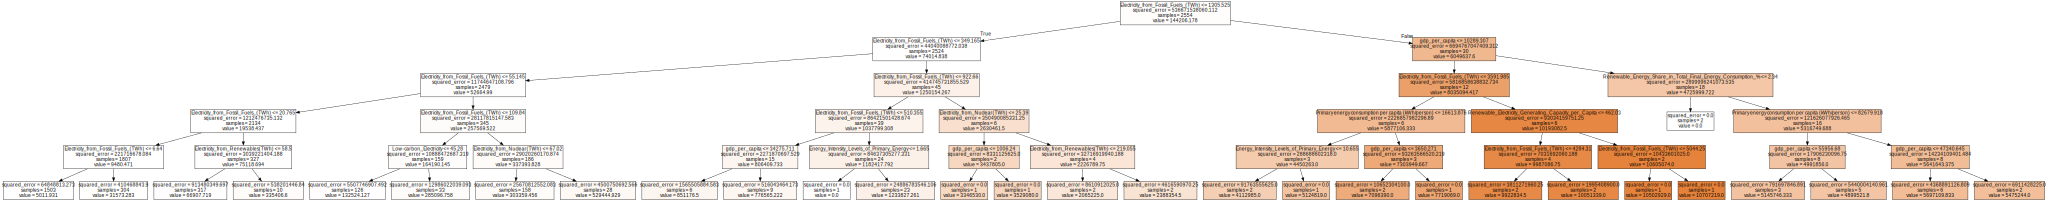

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names= feature_names,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png")
graph

# Regression

In [ ]:
test_set = (X_test, y_test)
IndVal = y_train
DepVal = X_train

#Fitting to model
Model_LR = linear_model.LinearRegression().fit(DepVal, IndVal)

#Results
print('Coefficent of the Model:', Model_LR.coef_,'\n')
print('Intercept of the Model:', Model_LR.intercept_)

Coefficent of the Model: [ 9.62610892e+02 -6.39058870e+01  4.22324168e+02  2.22619345e+03
 -5.70882628e+02 -8.68849284e+02  8.08891264e+02 -1.47726774e-01
  7.02435269e+03  1.39190725e-01] 

Intercept of the Model: -133641.04997388847


In [ ]:
#Predictions
Model_LR.predict(X_test)

array([ -6559.57625517, -40305.85104169, -24479.79039944, ...,
        62713.74160622,  24613.14754359,  45573.55638702])

In [ ]:
#Variance
r2_score(y_true= y_test,
         y_pred= Model_LR.predict(X_test))

0.9439733207510641

In [ ]:
#Scoring the Model
Model_LR.score(X_test,y_test)

0.9439733207510641